In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array

In [ ]:
img_path='/content/images (14).jpg'
img=load_img(img_path)

In [ ]:
img_array=img_to_array(img)

In [ ]:
img_array=img_array.reshape((1,)+img_array.shape)

In [ ]:
datagen=ImageDataGenerator(
rescale=1./255,
rotation_range=20,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode ='nearest'
)

In [ ]:
augumented_images=datagen.flow(img_array,batch_size=1)

In [ ]:
# Corrected visualize_augmented_images function
def visualize_augmented_images(generator, num_images):
  fig, axes=plt.subplots(1, num_images, figsize=(20, 20))
  for i in range(num_images):
    batch=next(generator)
    aug_image =batch[0]
    axes[i].imshow(aug_image)
  plt.show()

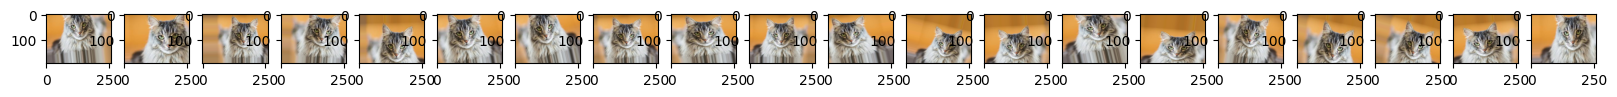

In [ ]:
visualize_augmented_images(augumented_images,20)

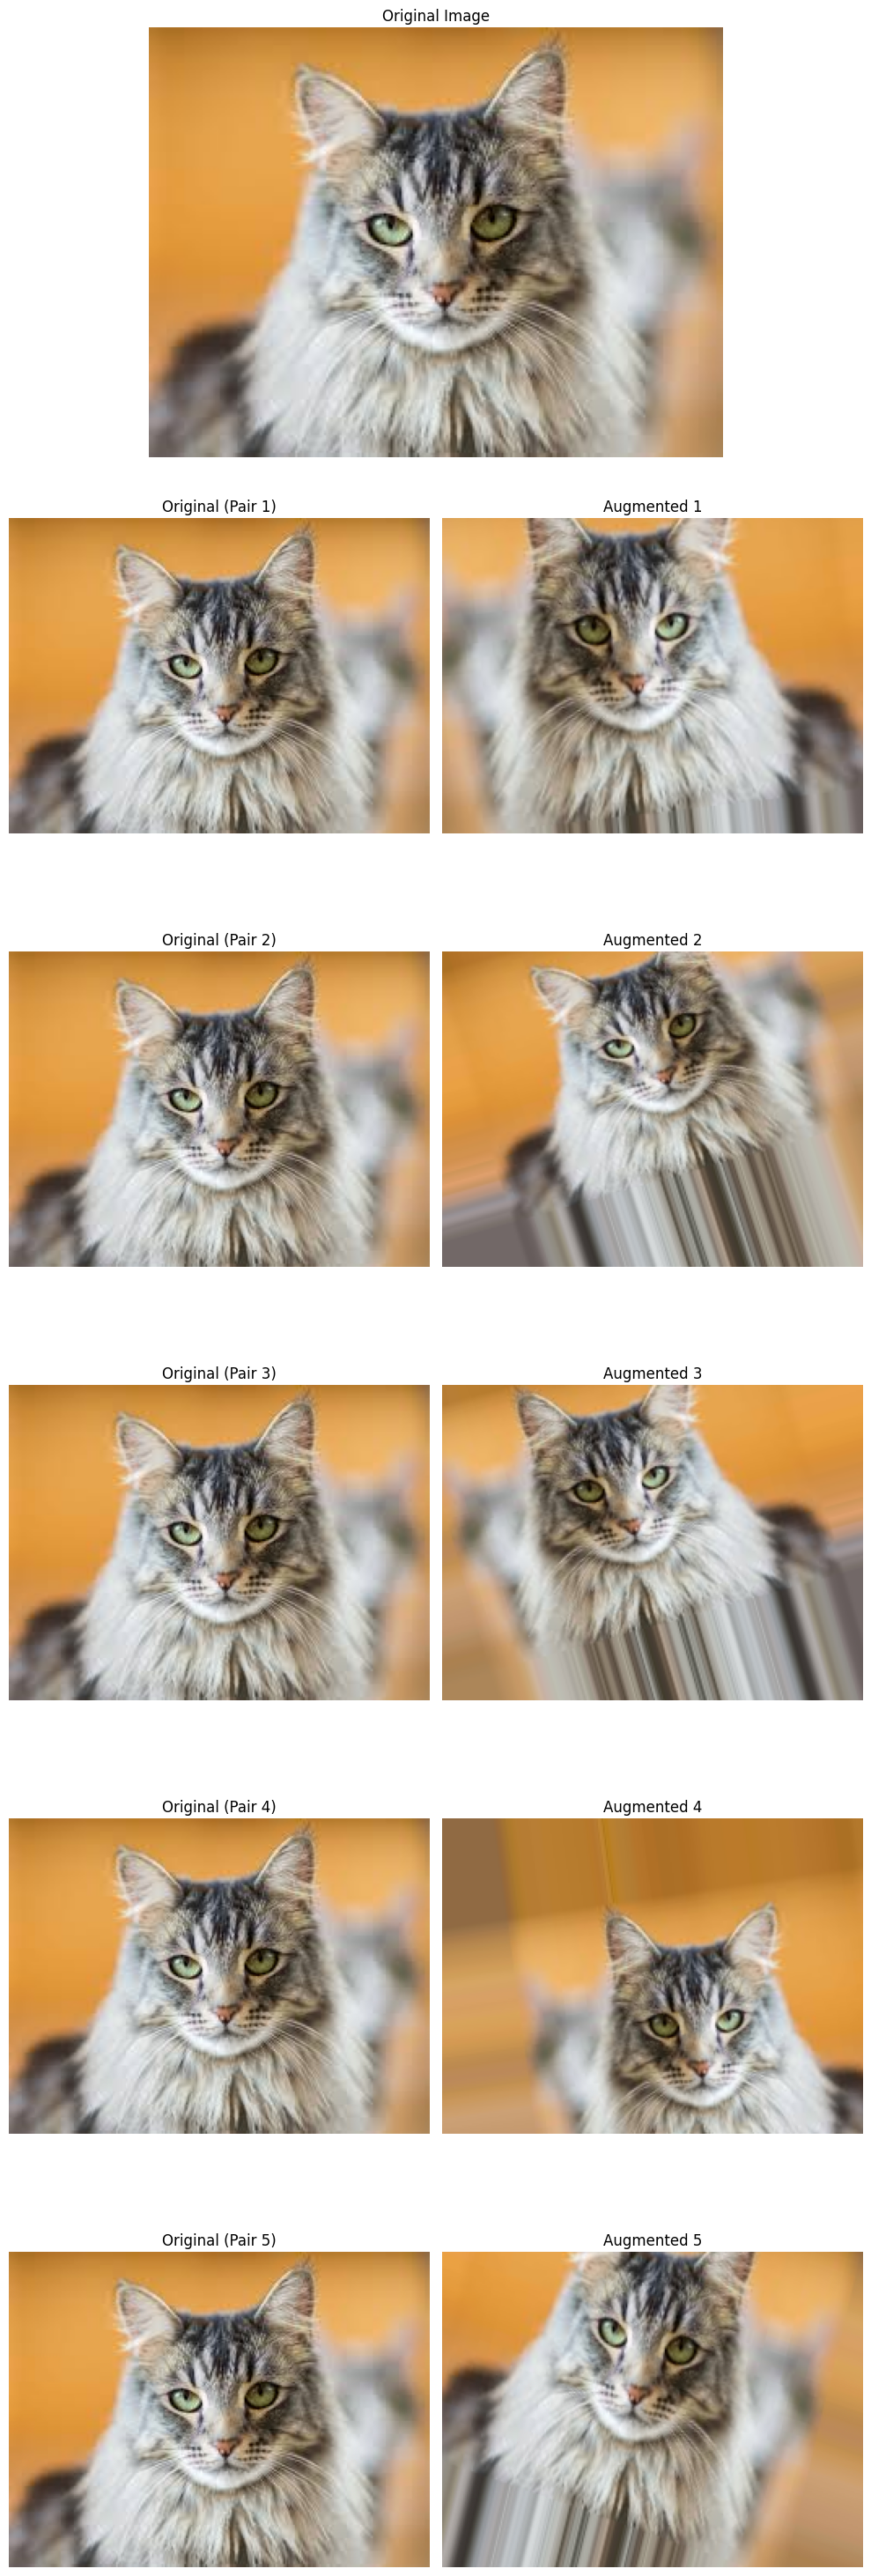

In [ ]:
from IPython import get_ipython
from IPython.display import display
# %%
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
# %%
img_path='/content/images (14).jpg'
img = load_img(img_path)
# %%
img_array =img_to_array(img)
# %%
img_array_expanded =img_array.reshape((1,) + img_array.shape) # Use a new variable for the expanded array
# %%
datagen=ImageDataGenerator(
rescale=1./255,
rotation_range=20,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode ='nearest'
)
# %%
augmented_image_generator = datagen.flow(img_array_expanded, batch_size=1)
# %%
# Function to visualize original image in the first row, and original vs augmented side-by-side in subsequent rows
def visualize_mixed_layout(original_image, augmented_image_generator, num_augmented_pairs):
    # We need num_augmented_pairs + 1 rows
    # The first row has 1 image, subsequent rows have 2 images
    # We can create a grid with 2 columns and merge the cells in the first row

    fig = plt.figure(figsize=(10, 5 * (num_augmented_pairs + 1))) # Adjust figure size

    # Add the first subplot for the original image (spanning both columns in the first row)
    ax0 = plt.subplot2grid((num_augmented_pairs + 1, 2), (0, 0), colspan=2)
    ax0.imshow(original_image.astype('uint8'))
    ax0.set_title("Original Image")
    ax0.axis('off')

    # Add subplots for original and augmented images side-by-side in subsequent rows
    for i in range(num_augmented_pairs):
        # Subplot for the original image
        ax_orig = plt.subplot2grid((num_augmented_pairs + 1, 2), (i + 1, 0))
        ax_orig.imshow(original_image.astype('uint8'))
        ax_orig.set_title(f"Original (Pair {i+1})")
        ax_orig.axis('off')

        # Subplot for the augmented image
        ax_aug = plt.subplot2grid((num_augmented_pairs + 1, 2), (i + 1, 1))
        batch = next(augmented_image_generator)
        aug_image = batch[0]
        ax_aug.imshow(aug_image)
        ax_aug.set_title(f"Augmented {i+1}")
        ax_aug.axis('off')

    plt.tight_layout()
    plt.show()

# %%
# Call the function to visualize the mixed layout
# Visualize original in the first row, and 5 pairs of original vs augmented below
visualize_mixed_layout(img_array, augmented_image_generator, 5)